# Natural Language Processing Project using Yelp customer review data

### Author : Dhaval Sawlani

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

The "useful" and "funny" columns are similar to the "cool" column.

The goal of this project is to predict whether the customer will rate the business as GOOD, BAD or NEUTRAL

We have information regarding the Stars that where allocated to a business by a user. Using this we will create a new attrubute that is CUSTOMER EXP which will categorize stars 1 & 2 as BAD experience, star 3 as NEUTRAL and stars 4 % 5 as GOOD experience.

We will use  Word clouds to obtain better infographic content of all the reviews.

## Importing useful libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
%matplotlib inline
from wordcloud.wordcloud import WordCloud, STOPWORDS
from PIL import Image

## Reading the Data and interpreting it

*The file was downlaoded from the yelp data-set available on the website and was converted into refined form in order to make the analysis easier*

In [2]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [4]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


## Creating Features

Here we create the Customer Experience column where we categorize the Stars given by customers to different business as **GOOD, BAD and NEUTRAL**.

Also, we create a new feature that is **Text Length** that gives the length of the reviews. This feature will give us an understanding of customer behavior and their experience.

In [5]:
Cust = []
for i in yelp['stars']:
    if (i == 1):
        Cust.append('BAD')
    elif (i == 3) | (i == 2):
        Cust.append('NEUTRAL')
    else:
        Cust.append('GOOD')
        

yelp['Customer EXP'] = Cust
yelp['Customer EXP'].value_counts()
yelp['Text length'] = yelp['text'].apply(lambda x:len(x.split()))
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Customer EXP,Text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,GOOD,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,GOOD,257
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,GOOD,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,GOOD,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,GOOD,86


# Exploratory Data Analysis

Customer EXP
BAD        153.953271
GOOD       123.048958
NEUTRAL    146.817420
Name: Text length, dtype: float64

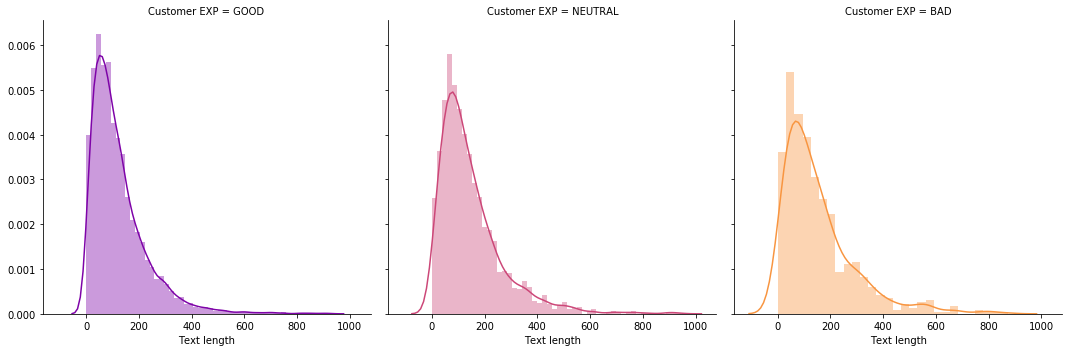

In [6]:
a = sns.FacetGrid(data = yelp, col = 'Customer EXP', hue = 'Customer EXP', palette='plasma', size=5)
a.map(sns.distplot, "Text length")
yelp.groupby('Customer EXP').mean()['Text length']

From the above graph we find the Density distributions and Histograms of the Text lengths for Reviews that where marked as GOOD, BAD and NEUTRAL. 
We observe that people who tend to review a business as BAD or NEUTRAL have approximately 150 words in their reviews while people who are suppposed to review the business as a GOOD experience have on average about 100 words in their reviews.

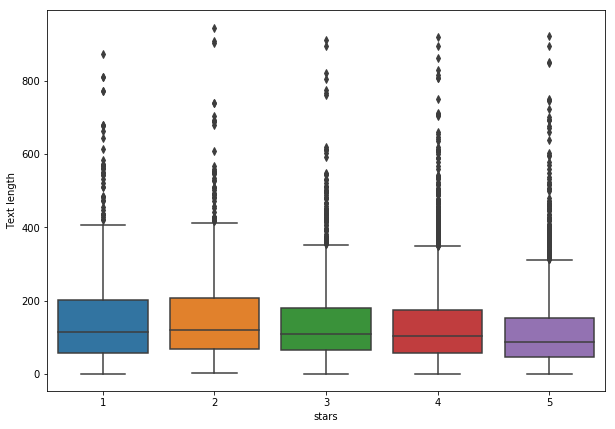

In [7]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'stars', y = 'Text length', data = yelp)

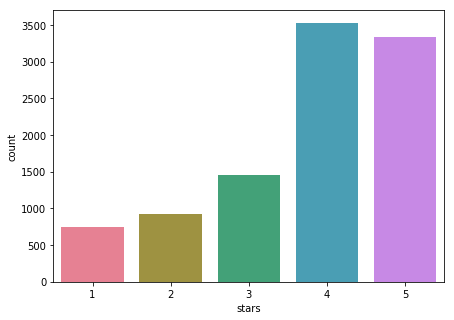

In [8]:
plt.figure(figsize = (7,5))
sns.countplot('stars', data = yelp, palette="husl")

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

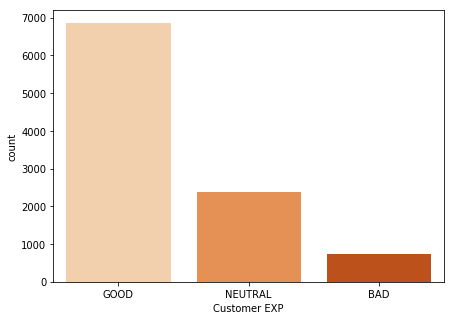

In [9]:
plt.figure(figsize = (7,5))
sns.countplot('Customer EXP', data = yelp, palette="Oranges")

Lets find the **Correlation between COOL, USEFUL, FUNNY and TEXTLENGTH** features from the data set when we group by it according to **STARS**

In [10]:
yelp.groupby('Customer EXP').mean().corr()

,stars,cool,useful,funny,Text length
stars,1.000000,0.999241,-0.879741,-0.963643,-0.966952
cool,0.999241,1.000000,-0.897596,-0.973321,-0.956285
useful,-0.879741,-0.897596,1.000000,0.974794,0.729446
funny,-0.963643,-0.973321,0.974794,1.000000,0.863673
Text length,-0.966952,-0.956285,0.729446,0.863673,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

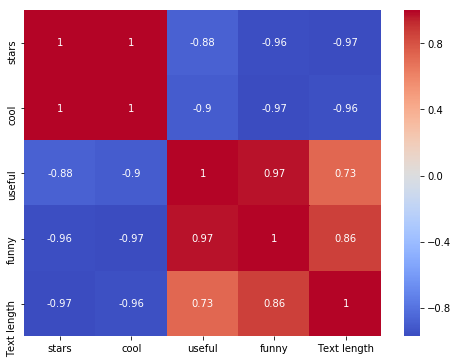

In [11]:
plt.figure(figsize = (8,6))
sns.heatmap(yelp.groupby('Customer EXP').mean().corr(), cmap = "coolwarm", annot=True)

## Classification Algorithm for our Prediction

** Splitting our data set into Train and Test **

In [20]:
x = yelp['text']
y = yelp['Customer EXP']
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

f:\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Engineering a Text cleaning function to remove the Punctuations and Stopwords from the data**

In [21]:
from nltk.corpus import stopwords
def text_clean(message):
    nopunc = [i for i in message if i not in string.punctuation]
    nn = "".join(nopunc)
    nn = nn.lower().split()
    nostop = [words for words in nn if words not in stopwords.words('english')]
    return(nostop)

In [12]:
good = yelp[yelp['Customer EXP'] == 'GOOD']
bad = yelp[yelp['Customer EXP'] == 'BAD']
neu = yelp[yelp['Customer EXP'] == 'NEUTRAL']

### Cleaning the Review for BAD, NEUTRAL and GOOD by removing the stopwords and Punctuations

In [15]:
good_bow = text_clean(good['text'])

In [16]:
bad_bow = text_clean(bad['text'])

In [17]:
neu_bow = text_clean(neu['text'])

In [32]:
good_para = ' '.join(good_bow)
bad_para = ' '.join(bad_bow)
new_para = ' '.join(neu_bow)

** Word cloud to display the most common words in the Reviews where customer experience was GOOD **

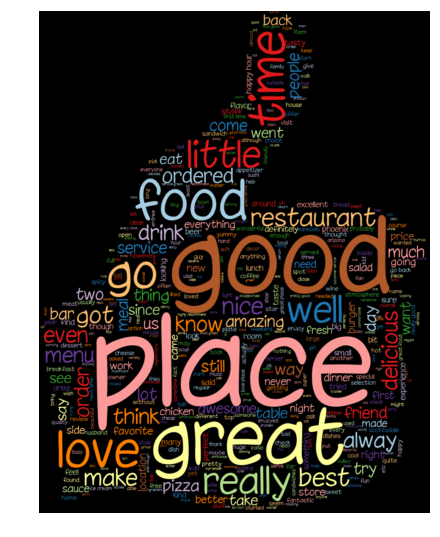

In [127]:
stopwords = set(STOPWORDS)
stopwords.add('one')
stopwords.add('also')
mask_image = np.array(Image.open("thumb_up.png"))
wordcloud_good = WordCloud(colormap = "Paired",mask = mask_image, font_path = "C:\Windows\Fonts\chint__.ttf", width = 300, height = 200, scale=2,max_words=1000, stopwords=stopwords).generate(good_para)
plt.figure(figsize = (7,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.figure(figsize = (10,6))
plt.show()
wordcloud_good.to_file("good.png")

** Word cloud to display the most common words in the Reviews where customer experience was BAD **

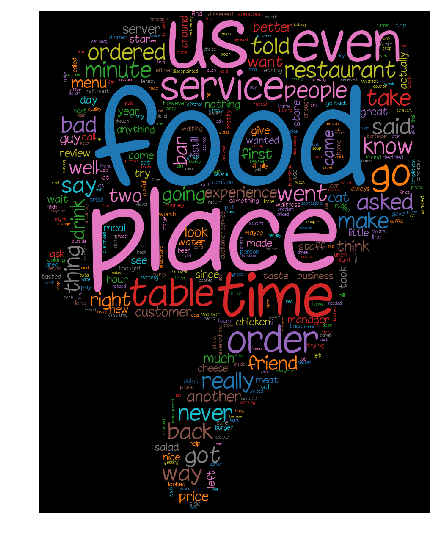

In [106]:
stopwords = set(STOPWORDS)
stopwords.add('one')
stopwords.add('also')
stopwords.add('good')
mask_image1 = np.array(Image.open("thumb_down.png"))
wordcloud_bad = WordCloud(colormap = 'tab10', mask = mask_image1, font_path = "C:\Windows\Fonts\chint__.ttf", width = 1100, height = 700, scale=2,max_words=1000, stopwords=stopwords).generate(bad_para)
plt.figure(figsize = (7,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('bad.png')

** Word cloud to display the most common words in the Reviews where customer experience was NEUTRAL **

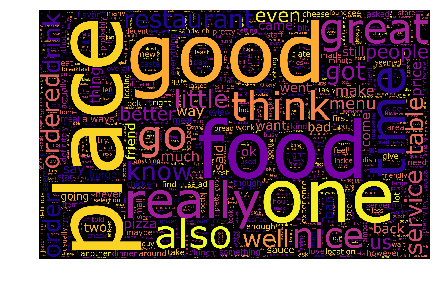

In [99]:
stopwords = set(STOPWORDS)
wordcloud_neu = WordCloud(colormap = "plasma",font_path = "C:\Windows\Fonts\Verdana.ttf", width = 1100, height = 700, scale=2,max_words=1000, stopwords=stopwords).generate(new_para)
plt.figure(figsize = (7,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('neu.png')

** Observations from the Word Cloud **

1. The customers which reviewed a business to be ***GOOD*** used words such as ** GOOD, TIME, FOOD, LOVE, PLACE **
2. The businesses which where reviewed to be ***NEUTRAL*** had words such as ** FOOD, REALLY, PLACE, ORDERED, WELL, NICE **
3. The customers which reviewed a business to be ***BAD*** i.e. Stars = 1 used words such as ** TABLE, TIME, ORDER, SERVICE, EVEN, BETTER**

From these observations, we find that there are a lot of unique words in our reviews which can turn up as good classifiers for a business. These words can be used as independent variables to classfify the reviews and customer experience as GOOD, BAD or NEUTRAL.

We shall use ** Naive Bayes classfier and Random Forest** to classify the customer experience.

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
cv_transformer = CountVectorizer(analyzer = text_clean)

In [23]:
x = cv_transformer.fit_transform(x)

In [128]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)
x

<10000x36271 sparse matrix of type '<class 'numpy.int64'>'
	with 575277 stored elements in Compressed Sparse Row format>

## Training a Naive bayes model on Reviews data set

In [111]:
from sklearn.naive_bayes import MultinomialNB

In [112]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

In [113]:
predictions = nb.predict(x_test)
predictions

array(['NEUTRAL', 'GOOD', 'GOOD', ..., 'GOOD', 'GOOD', 'GOOD'],
      dtype='<U7')

** Creating a confusion matrix and classification report using these predictions and the original values**

In [114]:
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[  32   70  118]
 [  12 1928  124]
 [   6  416  294]]


             precision    recall  f1-score   support

        BAD       0.64      0.15      0.24       220
       GOOD       0.80      0.93      0.86      2064
    NEUTRAL       0.55      0.41      0.47       716

avg / total       0.73      0.75      0.72      3000



We find that the **Naive Bayes predictor** performs pretty well! It helps us recognize **73% of our test data correctly.**

## Fitting a Random forest classifier to predict the Customer Experience

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf = RandomForestClassifier(criterion='gini', class_weight='balanced', n_estimators=50)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### Predictions for Random forest Classification model

In [142]:
pred_rf = rf.predict(x_test)

### Building Confusion matrix and classification report for Random Forest model

In [143]:
print("Confusion Matrix\n",confusion_matrix(y_test, pred_rf))
print("\n")
print("Classification report\n",classification_report(y_test, pred_rf))

Confusion Matrix
 [[   5  189   26]
 [   2 2051   11]
 [   0  663   53]]


Classification report
              precision    recall  f1-score   support

        BAD       0.71      0.02      0.04       220
       GOOD       0.71      0.99      0.83      2064
    NEUTRAL       0.59      0.07      0.13       716

avg / total       0.68      0.70      0.60      3000



From the classification report for **Random forest classifier** we find that the model accuracy is **65%**.

#Conclusions

1. Words used inside the reviews can be used as classifiers to categorize the customer expereince in GOOD, BAD and NEUTRAL.

2. **Naive Bayes classifier gives us a higher accuracy with 73%** instances that where correctly recognized.

3. While, ** Random forest classfier has an accuracy of 68%.**